In [55]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Data Visualisation

In [56]:
df=pd.read_csv(r'diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [57]:
df.isnull().sum()
for i in df.columns:
   missing_data=df[i].isnull().sum()
   percent_missing=(missing_data/len(df))*100
   print(i+' missing:',missing_data,"values",",percent", percent_missing)

Pregnancies missing: 0 values ,percent 0.0
Glucose missing: 0 values ,percent 0.0
BloodPressure missing: 0 values ,percent 0.0
SkinThickness missing: 0 values ,percent 0.0
Insulin missing: 0 values ,percent 0.0
BMI missing: 0 values ,percent 0.0
DiabetesPedigreeFunction missing: 0 values ,percent 0.0
Age missing: 0 values ,percent 0.0
Outcome missing: 0 values ,percent 0.0


In [58]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [59]:
for col in df.columns:
    print(col)
    print('{} -> {}'.format(df[col].min(),df[col].max()))
    print("---------------------")

Pregnancies
0 -> 17
---------------------
Glucose
0 -> 199
---------------------
BloodPressure
0 -> 122
---------------------
SkinThickness
0 -> 99
---------------------
Insulin
0 -> 846
---------------------
BMI
0.0 -> 67.1
---------------------
DiabetesPedigreeFunction
0.078 -> 2.42
---------------------
Age
21 -> 81
---------------------
Outcome
0 -> 1
---------------------


In [60]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

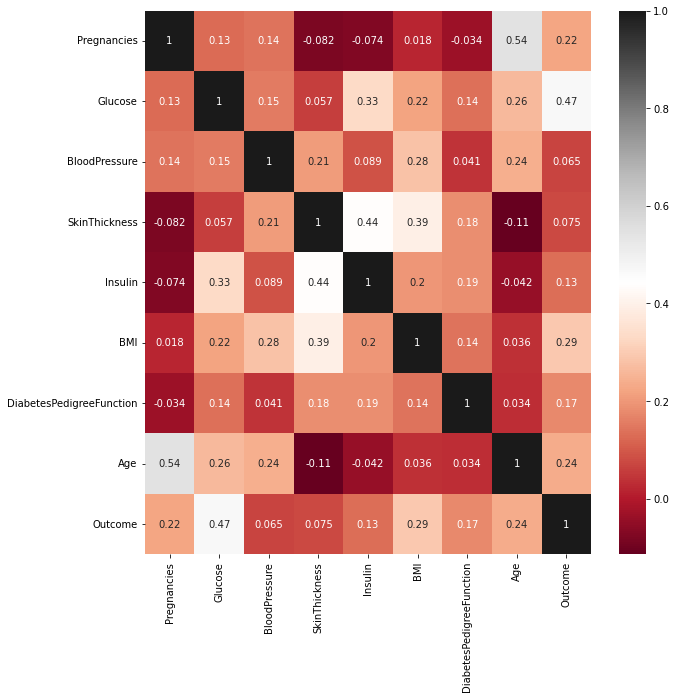

In [61]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='RdGy',annot=True)
plt.show()

# Data Preprocessing

In [62]:
X=np.array(df.iloc[:,:8]).reshape(-1,8)
Y=np.array(df.iloc[:,-1]).reshape(-1,1)
df.head()
print(X.shape)
print(Y.shape)

(768, 8)
(768, 1)


In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

# Scaling values

In [64]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Train Decision Tree Model

In [87]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)

In [88]:
from sklearn import metrics
print("Accuracy :",metrics.accuracy_score(Y_test,y_pred))

Accuracy : 0.7987012987012987


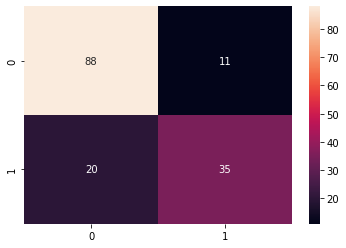

In [89]:
sns.heatmap(metrics.confusion_matrix(Y_test, y_pred),annot=True)
plt.show()

In [90]:
from sklearn.model_selection import  GridSearchCV
parameters={'max_depth':range(3,10)}
clf_ = GridSearchCV(DecisionTreeClassifier(criterion='gini'), parameters)
clf_.fit(X_train,Y_train)
tree_model = clf_.best_estimator_
print (clf_.best_score_, clf_.best_params_)

0.7426362788218046 {'max_depth': 3}


# Visualization of the Decision Tree

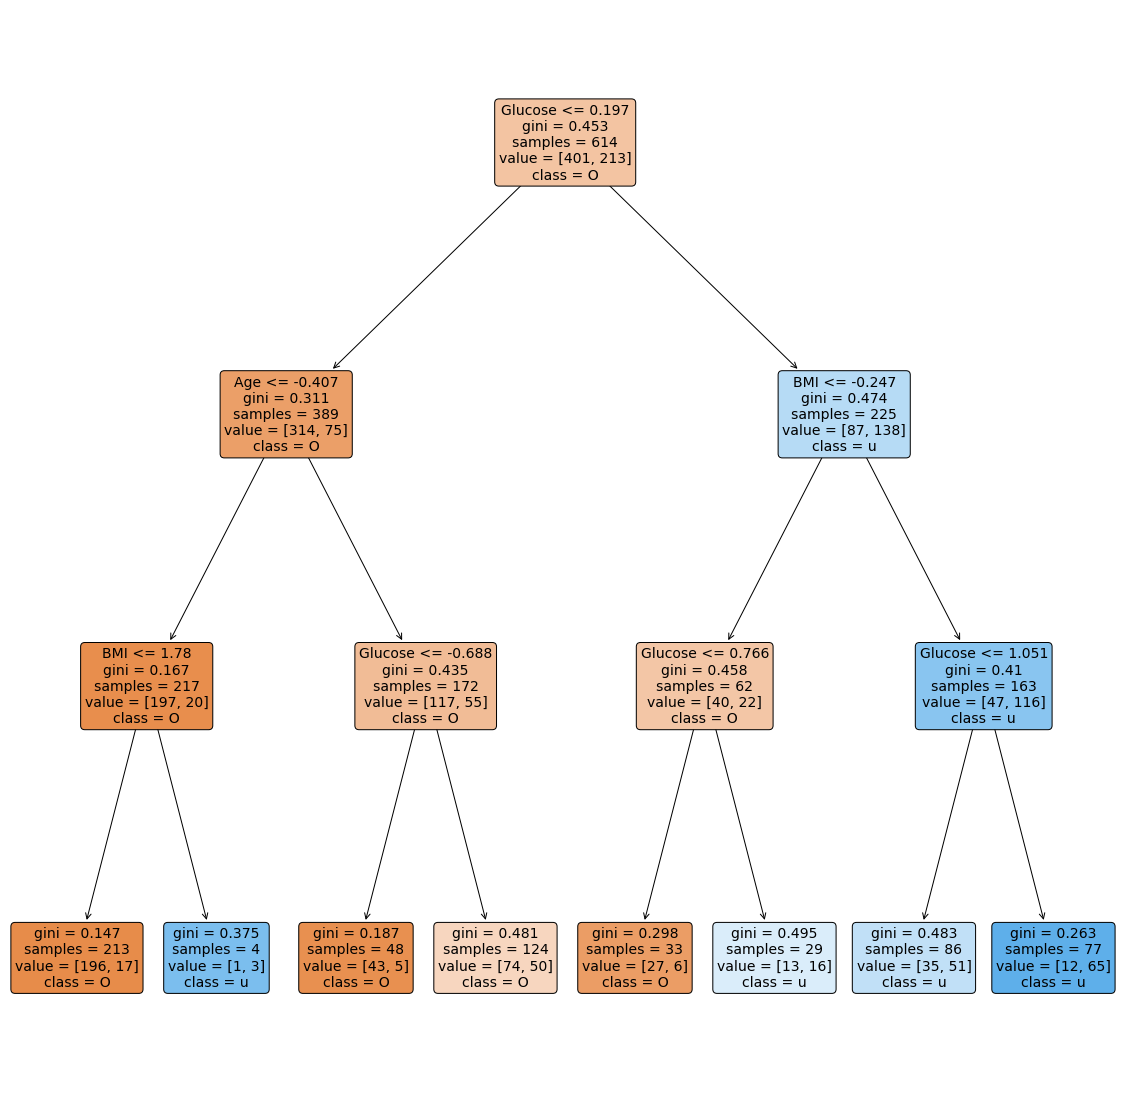

In [91]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
a = plot_tree(tree_model, 
              feature_names=df.iloc[:,:8].columns, 
              class_names='Outcome', 
              filled=True,
              rounded=True, 
              fontsize=14)

# Random Forest

In [92]:
X_train.shape,Y_train.ravel().shape

((614, 8), (614,))

In [120]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=165,max_depth=10)
clf=clf.fit(X_train,Y_train.ravel())


In [121]:
y_pred=clf.predict(X_test)

In [122]:
from sklearn import metrics
print("Accuracy :",metrics.accuracy_score(Y_test,y_pred))

Accuracy : 0.8181818181818182


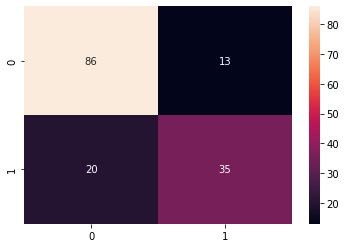

In [119]:
sns.heatmap(metrics.confusion_matrix(Y_test, y_pred),annot=True)
plt.show()

In [97]:
from sklearn import tree
f_n=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
t_n=["0","1"]
fig=plt.figure(figsize=(100,100),dpi=100)
plot=tree.plot_tree(clf.estimators_[5],feature_names=f_n,class_names=t_n,filled=True)
#fig.savefig("Tree1.png")